# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 9

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
431,Fabianski,West Ham,50,8.928571,50,45.498510,5.6,5.095833,6.624687,4.952494,2.278926
325,Darlow,Newcastle Utd,50,9.000000,36,40.779398,4.0,4.531044,4.564796,4.598776,2.026345
96,Pope,Burnley,54,7.959184,39,36.469923,4.9,4.582119,5.977921,4.538889,1.971830
12,Martínez,Aston Villa,48,8.039216,41,33.130528,5.1,4.121114,3.380914,4.525914,1.881023
363,McCarthy,Southampton,45,9.090909,40,35.450275,4.4,3.899530,4.381643,4.046781,1.838256
455,Patrício,Wolves,55,8.936170,42,36.886381,4.7,4.127762,5.108367,3.882974,1.760084
383,Lloris,Tottenham,55,9.024390,37,36.883064,4.1,4.087042,4.868833,3.798413,1.742721
252,Alisson,Liverpool,59,7.045455,31,29.796820,4.4,4.229226,3.867879,4.312518,1.741145
8,Leno,Arsenal,50,9.047619,38,35.024175,4.2,3.871093,4.428795,3.948579,1.731205


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
389,Aurier,Tottenham,52,3.015873,19,15.789121,6.3,5.235340,2.947301,4.916339,2.295849
470,Kilman,Wolves,43,6.037736,32,28.373303,5.3,4.699328,4.586574,4.435440,2.266217
277,Cancelo,Manchester City,55,5.000000,25,25.850639,5.0,5.170128,5.823954,5.620108,2.204550
563,Ait Nouri,Wolves,50,3.015873,19,14.174051,6.3,4.699817,4.728681,4.435909,2.101822
232,Chilwell,Chelsea,61,6.000000,48,30.804232,8.0,5.134039,4.936691,4.996240,2.078712
88,Mee,Burnley,49,2.000000,14,8.979622,7.0,4.489811,4.175661,4.429488,2.028290
558,Coufal,West Ham,46,5.961538,31,25.713274,5.2,4.313194,4.656598,4.197238,2.011037
442,Masuaku,West Ham,45,7.954545,35,33.862031,4.4,4.256941,3.544687,4.158750,2.006741
435,Cresswell,West Ham,52,9.000000,45,40.944210,5.0,4.549357,4.202894,4.444108,1.995025


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
141,Zaha,Crystal Palace,73,7.941176,54,47.855958,6.8,6.026306,7.658595,6.151924,2.230436
105,Jorginho,Chelsea,51,6.981132,37,34.691843,5.3,4.969372,2.424606,4.890540,2.200475
37,Grealish,Aston Villa,76,8.026316,61,48.136794,7.6,5.997371,4.962124,6.114730,2.175475
390,Son,Tottenham,95,9.032258,84,59.209164,9.3,6.555300,6.095415,6.429902,2.126820
254,Salah,Liverpool,122,7.976190,67,59.021581,8.4,7.399721,6.841970,7.125341,2.118534
302,Fernandes,Manchester Utd,108,8.000000,64,54.207634,8.0,6.775954,7.926423,6.811803,2.061857
251,Mané,Liverpool,121,8.032787,49,54.591039,6.1,6.796027,5.846877,6.536842,1.953720
33,Hourihane,Aston Villa,60,3.000000,18,14.176423,6.0,4.725474,1.000000,4.835732,1.929167
450,Fornals,West Ham,65,9.056604,48,43.887464,5.3,4.845908,4.769753,4.899597,1.900721


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,7.971014,55,50.395808,6.9,6.322383,5.242130,6.814696,2.479843
202,Bamford,Leeds United,61,8.955224,60,53.635808,6.7,5.989332,6.540000,5.781035,2.425010
388,Kane,Tottenham,110,9.032258,84,72.201135,9.3,7.993697,6.315491,7.921779,2.410190
224,Vardy,Leicester City,102,8.026316,61,57.355808,7.6,7.145970,8.069385,7.162268,2.237490
514,Watkins,Aston Villa,61,8.032787,49,43.637904,6.1,5.432474,4.520000,5.448327,2.199544
164,Calvert-Lewin,Everton,79,8.974359,70,53.517904,7.8,5.963424,5.111388,6.035953,2.121691
377,Adams,Southampton,59,9.056604,48,46.171616,5.3,5.098116,6.479542,5.119750,2.098861
68,Maupay,Brighton,64,8.000000,40,42.057904,5.0,5.257238,3.975000,5.456419,2.078106
588,Welbeck,Brighton,55,3.000000,12,13.500000,4.0,4.500000,4.500000,4.645775,1.918806


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,110,9.032258,84,72.201135,9.3,7.993697,7.072756,2.410190
254,Salah,Liverpool,122,7.976190,67,59.021581,8.4,7.399721,6.277610,2.118534
224,Vardy,Leicester City,102,8.026316,61,57.355808,7.6,7.145970,8.120596,2.237490
251,Mané,Liverpool,121,8.032787,49,54.591039,6.1,6.796027,5.731069,1.953720
302,Fernandes,Manchester Utd,108,8.000000,64,54.207634,8.0,6.775954,6.187430,2.061857
390,Son,Tottenham,95,9.032258,84,59.209164,9.3,6.555300,5.771957,2.126820
506,Wilson,Newcastle Utd,65,7.971014,55,50.395808,6.9,6.322383,6.245474,2.479843
141,Zaha,Crystal Palace,73,7.941176,54,47.855958,6.8,6.026306,6.531997,2.230436
597,Sánchez,Brighton,44,1.000000,1,6.007549,1.0,6.007549,5.799075,2.863987


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
506,Wilson,Newcastle Utd,65,7.971014,6.9,6.322383,5.242130,6.245474,6.814696,2.479843
202,Bamford,Leeds United,61,8.955224,6.7,5.989332,6.540000,5.624812,5.781035,2.425010
388,Kane,Tottenham,110,9.032258,9.3,7.993697,6.315491,7.072756,7.921779,2.410190
389,Aurier,Tottenham,52,3.015873,6.3,5.235340,2.947301,4.440152,4.916339,2.295849
431,Fabianski,West Ham,50,8.928571,5.6,5.095833,6.624687,4.875475,4.952494,2.278926
470,Kilman,Wolves,43,6.037736,5.3,4.699328,4.586574,4.825438,4.435440,2.266217
224,Vardy,Leicester City,102,8.026316,7.6,7.145970,8.069385,8.120596,7.162268,2.237490
141,Zaha,Crystal Palace,73,7.941176,6.8,6.026306,7.658595,6.531997,6.151924,2.230436
277,Cancelo,Manchester City,55,5.000000,5.0,5.170128,5.823954,5.862993,5.620108,2.204550


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
224,Vardy,Leicester City,102,8.026316,61,57.355808,7.6,7.145970,8.069385,7.162268,2.237490
202,Bamford,Leeds United,61,8.955224,60,53.635808,6.7,5.989332,6.540000,5.781035,2.425010
117,Werner,Chelsea,95,9.056604,48,44.753712,5.3,4.941556,6.501788,4.897005,1.603252
377,Adams,Southampton,59,9.056604,48,46.171616,5.3,5.098116,6.479542,5.119750,2.098861
388,Kane,Tottenham,110,9.032258,84,72.201135,9.3,7.993697,6.315491,7.921779,2.410190
343,Sharp,Sheffield Utd,57,3.928571,11,10.920000,2.8,2.779636,5.800000,2.772964,1.164262
366,Ings,Southampton,83,7.014925,47,35.455808,6.7,5.054339,5.779012,5.073504,1.754387
282,Jesus,Manchester City,93,2.982456,17,15.000000,5.7,5.029412,5.450000,5.213245,1.649209
506,Wilson,Newcastle Utd,65,7.971014,55,50.395808,6.9,6.322383,5.242130,6.814696,2.479843


In [25]:
metric = 'next1_xP'

display(df[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
141,Zaha,Crystal Palace,73,7.941176,54,47.855958,6.8,6.026306,6.531997,2.230436
254,Salah,Liverpool,122,7.976190,67,59.021581,8.4,7.399721,6.277610,2.118534
302,Fernandes,Manchester Utd,108,8.000000,64,54.207634,8.0,6.775954,6.187430,2.061857
508,Rodríguez,Everton,79,8.035714,45,41.668808,5.6,5.185452,5.877503,1.844901
390,Son,Tottenham,95,9.032258,84,59.209164,9.3,6.555300,5.771957,2.126820
251,Mané,Liverpool,121,8.032787,49,54.591039,6.1,6.796027,5.731069,1.953720
272,De Bruyne,Manchester City,116,7.073171,29,38.933338,4.1,5.504368,5.632049,1.616138
37,Grealish,Aston Villa,76,8.026316,61,48.136794,7.6,5.997371,5.412229,2.175475
450,Fornals,West Ham,65,9.056604,48,43.887464,5.3,4.845908,4.978016,1.900721


In [12]:
metric = 'xG'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
200,Dallas,Leeds United,45,9.090909,3.3,2.665868,2.320262,1.256702,1.1,0.3,1.4,0.154000
232,Chilwell,Chelsea,61,6.000000,8.0,5.134039,4.742196,2.078712,0.8,0.6,1.4,0.233333
255,Robertson,Liverpool,71,8.958333,4.8,4.576287,4.251454,1.717450,0.8,1.5,2.3,0.256744
41,Mings,Aston Villa,53,7.962963,5.4,3.324304,2.994218,1.443986,0.8,0.2,1.0,0.125581
491,Koch,Leeds United,45,8.928571,2.8,2.732499,2.423540,1.288112,0.7,0.2,0.9,0.100800
259,Alexander-Arnold,Liverpool,73,8.076923,2.6,3.789784,3.484342,1.402662,0.7,1.2,1.9,0.235238
298,Maguire,Manchester Utd,54,7.941176,3.4,2.991067,3.004837,1.287150,0.7,0.1,0.8,0.100741
156,Keane,Everton,51,9.032258,3.1,3.012404,2.989989,1.333915,0.7,0.2,0.9,0.099643
398,Sánchez,Tottenham,53,4.000000,1.0,3.216772,2.590582,1.397276,0.6,0.0,0.6,0.150000


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
262,0,0,15,100.0,75.0,0,195473,NaN,NaN,0,0,0,0,33.8,215,34,NaN,NaN,0,4,2.2,1.3,1,Rhian,1.7,5,0,5.7,331,44,False,12.0,362,39,256,NaN,2020-11-16T15:00:22.173271Z,45,0,0,NaN,0,NaN,195473.jpg,1.4,0,0,Brewster,6.1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.8,0.0,0.0,0.0,1.0,0.0,0.0,2.5,0.0,0.0,0.0,3.2,0.3,0.0,1.4,0.0,0.0,0.0,2.0,0.0,0.0,2.7,0.0,0.0,0.0,1.88,2.013233,1.87679,1.872392,0.417778,0.88624,0.7,0.14


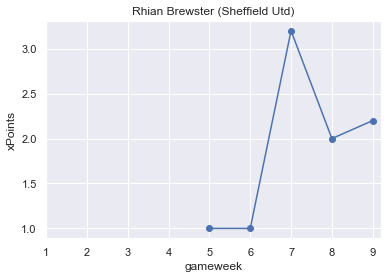

In [29]:
# find player index
name_string = 'Brew'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 508
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 3,xG_week3,goals_week3,xGA_week3,cleansheet_week3,xA_week3,assists_week3,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,20,0.0,0.0,1,176413,NaN,NaN,0,0,-3,3,14.1,287,155,NaN,NaN,0,3,0.0,0.0,0,Christian,0.0,2,0,11.3,272,126,False,26.4,315,135,173,Hamstring injury - Expected back 05 Dec,2020-10-31T18:00:12.906132Z,82,0,0,NaN,0,NaN,176413.jpg,2.0,0,0,Pulisic,1.7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.910803,0.1,0.0,2.2,0.0,0.1,0.0,2.996585,0.1,0.0,0.7,1.0,0.0,0.0,NaN,NaN,NaN,0.4,0.0,NaN,NaN,NaN,NaN,NaN,0.6,0.0,NaN,NaN,2.953694,2.326561,2.402485,2.408644,0.297604,0.852208,0.3,0.1


In [27]:
my_starting11 = [363,232,77,239,254,302,37,508,114,202,388]
my_subs = [35,200,146,262]

In [28]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,45,9.090909,4.4,3.899530,4.381643,3.953003,4.046781,1.838256
232,Chilwell,Chelsea,61,6.000000,8.0,5.134039,4.936691,4.742196,4.996240,2.078712
77,Lamptey,Brighton,48,9.032258,3.1,3.472781,4.015818,2.828076,3.402184,1.585101
239,Justin,Leicester City,48,8.947368,3.8,2.992128,3.252660,3.350437,3.018453,1.365713
254,Salah,Liverpool,122,7.976190,8.4,7.399721,6.841970,6.277610,7.125341,2.118534
302,Fernandes,Manchester Utd,108,8.000000,8.0,6.775954,7.926423,6.187430,6.811803,2.061857
37,Grealish,Aston Villa,76,8.026316,7.6,5.997371,4.962124,5.412229,6.114730,2.175475
508,Rodríguez,Everton,79,8.035714,5.6,5.185452,3.481399,5.877503,5.225497,1.844901
114,Ziyech,Chelsea,83,5.000000,6.0,5.031093,5.123673,4.832660,4.974960,1.746318



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN
200,Dallas,Leeds United,45,9.090909,3.3,2.665868,2.940849,2.320262,2.510574,1.256702
146,Mitchell,Crystal Palace,41,6.000000,2.5,2.600393,2.958936,3.063950,2.520210,1.284242
262,Brewster,Sheffield Utd,45,5.000000,1.4,1.880000,1.880000,2.013233,1.876790,0.886240


## Save data

In [19]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)